# Задание №2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Генерация данных

In [2]:
X, y = make_regression(n_samples = 1000, n_features = 10, n_informative = 10, noise = 1.0, random_state = 42)

## Разделение данных

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Построение модели

In [4]:
regr = BaggingRegressor(estimator = LinearRegression(), n_jobs = -1, random_state = 42, verbose = 2).fit(X_train, y_train)
R2_score = regr.score(X_test, y_test)
MSE_score = mean_squared_error(y_test, regr.predict(X_test))
print("Коэффициент детерминации: "+str(R2_score)+".")
print("Среднеквадратическая ошибка: "+str(MSE_score)+".")

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Коэффициент детерминации: 0.9999433781286188.
Среднеквадратическая ошибка: 0.9542973525795841.


[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished


## Анализ модели

In [5]:
df =  pd.DataFrame(data = np.c_[X, y], columns = ["Признак "+str(i+1) for i in range(X.shape[1])]+["Целевая переменная"])
df.head()

,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5,Признак 6,Признак 7,Признак 8,Признак 9,Признак 10,Целевая переменная
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.604706
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,107.537952
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-114.845161
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,37.578671
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,132.104552


<Axes: >

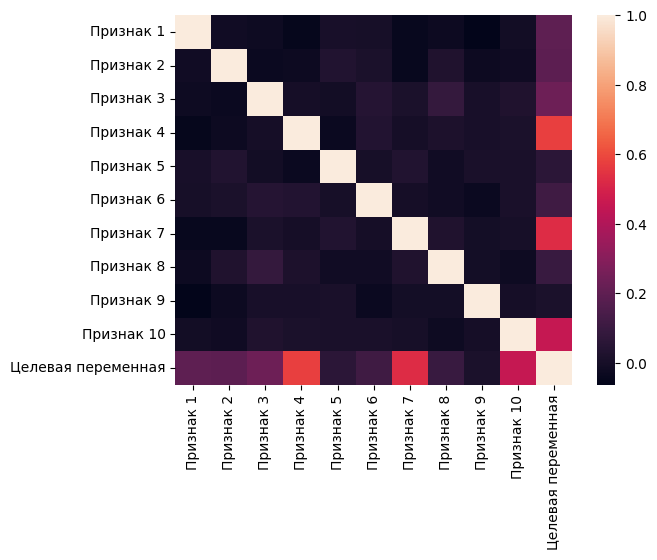

In [6]:
sns.heatmap(df.corr())

In [7]:
vif_df = pd.DataFrame()
vif_df["Признак"] = df.columns[:-1]
vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1]-1)]
display(vif_df)

,Признак,VIF
0,Признак 1,1296.397687
1,Признак 2,1119.645059
2,Признак 3,906.688290
3,Признак 4,6464.621948
4,Признак 5,54.412230
5,Признак 6,117.564291
6,Признак 7,5599.438534
7,Признак 8,93.596324
8,Признак 9,31.459957
9,Признак 10,3748.438101


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.0s finished


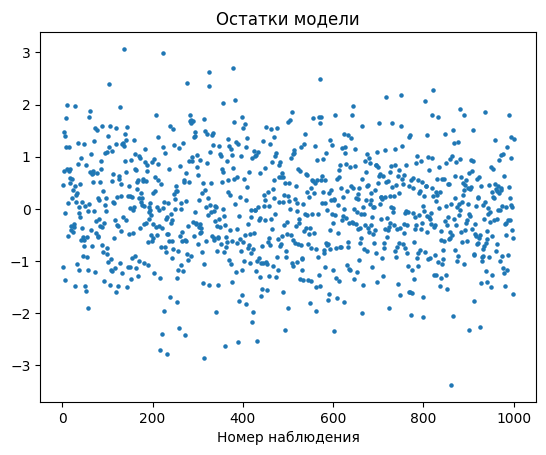

In [8]:
y_pred = regr.predict(X)
y_rem = y-y_pred
plt.scatter([i+1 for i in range(X.shape[0])], y_rem, s = 5)
plt.xlabel("Номер наблюдения")
plt.title("Остатки модели")
plt.show()

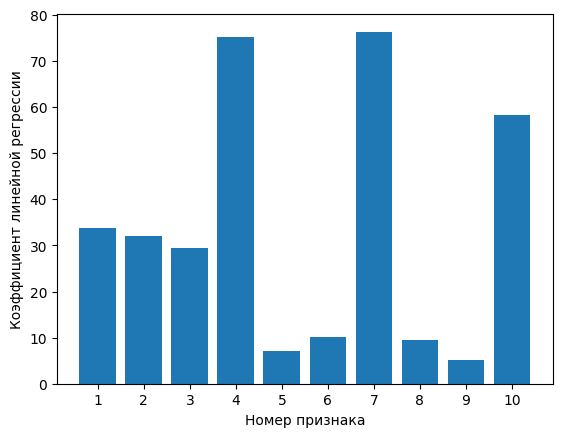

In [9]:
coef = np.mean([estimator.coef_ for estimator in regr.estimators_], axis = 0)
plt.bar([str(i+1) for i in range(len(coef))], coef)
plt.xlabel("Номер признака")
plt.ylabel("Коэффициент линейной регрессии")
plt.show()